In [ ]:
#pip install geopandas

In [ ]:
#import geopandas as gpd

In [86]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes
from matplotlib import pyplot
import mapclassify as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import adjustText as aT
import matplotlib.pyplot as plt

In [87]:
chicago = gpd.read_file('Boundaries - ZIP Codes') #reading in shp 
chicago

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


In [88]:
totalData = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_newly.csv') #reading in csv
totalData
#head(totaData)

# exatract years 
totalData['Week Start'] = totalData['Week Start'].astype('datetime64[ns]')
totalData.head()
totalData['year'] = totalData['Week Start'].dt.year
totalData

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,year
0,60603,10,2020-03-01,03/07/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-10,POINT (-87.625473 41.880112),2020
1,60603,11,2020-03-08,03/14/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-11,POINT (-87.625473 41.880112),2020
2,60603,12,2020-03-15,03/21/2020,NaN,NaN,NaN,NaN,1.0,1,...,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-12,POINT (-87.625473 41.880112),2020
3,60603,13,2020-03-22,03/28/2020,NaN,NaN,NaN,NaN,3.0,4,...,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-13,POINT (-87.625473 41.880112),2020
4,60603,14,2020-03-29,04/04/2020,NaN,NaN,NaN,NaN,6.0,10,...,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-14,POINT (-87.625473 41.880112),2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,Unknown,24,2020-06-07,06/13/2020,4.0,98.0,0.0,0.0,2581.0,21190,...,0.1,0.2,0,4,0.0,0.0,0,Unknown-2020-24,NaN,2020
3476,60707,5,2021-01-31,02/06/2021,26.0,1998.0,60.0,4644.5,NaN,4389,...,0.0,0.1,2,38,4.6,88.3,43019,60707-2021-5,POINT (-87.808283 41.921777),2021
3477,60707,6,2021-02-07,02/13/2021,13.0,2011.0,30.0,4674.7,NaN,4389,...,0.0,0.1,0,38,0.0,88.3,43019,60707-2021-6,POINT (-87.808283 41.921777),2021
3478,60707,7,2021-02-14,02/20/2021,13.0,2024.0,30.0,4704.9,NaN,4389,...,0.0,0.1,0,38,0.0,88.3,43019,60707-2021-7,POINT (-87.808283 41.921777),2021


In [89]:
# divide datasets based on years 
df_2020 = totalData.loc[totalData['year'] == 2020]
df_2020
df_2021 = totalData.loc[totalData['year'] == 2021]
df_2021

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,year
25,60603,12,2021-03-21,03/27/2021,4.0,72.0,341.0,6132.9,73.0,2107,...,0.1,0.0,0,0,0.0,0.0,1174,60603-2021-12,POINT (-87.625473 41.880112),2021
26,60608,2,2021-01-10,01/16/2021,186.0,6870.0,235.0,8673.7,2418.0,72860,...,0.1,0.1,2,127,2.5,160.3,79205,60608-2021-2,POINT (-87.670366 41.849879),2021
64,60601,14,2021-04-04,04/10/2021,16.0,1033.0,109.0,7039.2,787.0,24690,...,0.0,0.0,0,11,0.0,75.0,14675,60601-2021-14,POINT (-87.622844 41.886262),2021
88,60666,6,2021-02-07,02/13/2021,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0,0,0.0,0.0,0,60666-2021-6,POINT (-87.896371 41.979511),2021
105,60602,1,2021-01-03,01/09/2021,5.0,76.0,402.0,6109.3,63.0,1596,...,0.1,0.1,0,1,0.0,80.4,1244,60602-2021-1,POINT (-87.628309 41.883136),2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,60707,1,2021-01-03,01/09/2021,63.0,1849.0,146.0,4298.1,NaN,4389,...,0.0,0.1,1,34,2.3,79.0,43019,60707-2021-1,POINT (-87.808283 41.921777),2021
3476,60707,5,2021-01-31,02/06/2021,26.0,1998.0,60.0,4644.5,NaN,4389,...,0.0,0.1,2,38,4.6,88.3,43019,60707-2021-5,POINT (-87.808283 41.921777),2021
3477,60707,6,2021-02-07,02/13/2021,13.0,2011.0,30.0,4674.7,NaN,4389,...,0.0,0.1,0,38,0.0,88.3,43019,60707-2021-6,POINT (-87.808283 41.921777),2021
3478,60707,7,2021-02-14,02/20/2021,13.0,2024.0,30.0,4704.9,NaN,4389,...,0.0,0.1,0,38,0.0,88.3,43019,60707-2021-7,POINT (-87.808283 41.921777),2021


In [90]:
# get a specific week data
df = df_2020
df = df.dropna()
df = df.loc[df['Week Number'] == 53]
df

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,year
104,60602,53,2020-12-27,01/02/2021,3.0,71.0,241.0,5707.4,42.0,1533,...,0.1,0.1,0,1,0.0,80.4,1244,60602-2020-53,POINT (-87.628309 41.883136),2020
151,60606,53,2020-12-27,01/02/2021,11.0,222.0,355.0,7159.0,155.0,5243,...,0.1,0.1,0,1,0.0,32.2,3101,60606-2020-53,POINT (-87.63676 41.882634),2020
182,60601,53,2020-12-27,01/02/2021,25.0,763.0,170.0,5199.3,539.0,15150,...,0.1,0.1,0,10,0.0,68.1,14675,60601-2020-53,POINT (-87.622844 41.886262),2020
267,60610,53,2020-12-27,01/02/2021,81.0,2394.0,208.0,6135.5,1532.0,41802,...,0.1,0.1,1,24,2.6,61.5,39019,60610-2020-53,POINT (-87.63581 41.90455),2020
313,60611,53,2020-12-27,01/02/2021,85.0,1657.0,262.0,5110.1,1041.0,33383,...,0.1,0.1,1,11,3.1,33.9,32426,60611-2020-53,POINT (-87.620291 41.894734),2020
365,60603,53,2020-12-27,01/02/2021,3.0,49.0,256.0,4173.8,45.0,1114,...,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-53,POINT (-87.625473 41.880112),2020
397,60604,53,2020-12-27,01/02/2021,1.0,79.0,128.0,10102.3,54.0,1176,...,0.0,0.1,0,0,0.0,0.0,782,60604-2020-53,POINT (-87.629029 41.878153),2020
419,60613,53,2020-12-27,01/02/2021,110.0,2718.0,220.0,5423.7,2222.0,52717,...,0.1,0.1,1,40,2.0,79.8,50113,60613-2020-53,POINT (-87.661343 41.953742),2020
453,60605,53,2020-12-27,01/02/2021,49.0,1409.0,178.0,5120.1,1014.0,27000,...,0.1,0.1,1,9,3.6,32.7,27519,60605-2020-53,POINT (-87.623449 41.867824),2020
525,60607,53,2020-12-27,01/02/2021,80.0,1940.0,270.0,6556.0,1192.0,35249,...,0.1,0.0,0,5,0.0,16.9,29591,60607-2020-53,POINT (-87.652727 41.876104),2020


In [91]:
merged = chicago.merge(df, left_on='zip', right_on='ZIP Code', how='left') #merge into gdf (with all states)
merged

,objectid,shape_area,shape_len,zip,geometry,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,...,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,year
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",60647,53.0,2020-12-27,01/02/2021,251.0,...,0.1,0.1,6.0,129.0,6.9,147.4,87509.0,60647-2020-53,POINT (-87.701101 41.921058),2020.0
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",60639,53.0,2020-12-27,01/02/2021,435.0,...,0.2,0.2,11.0,193.0,12.2,213.2,90517.0,60639-2020-53,POINT (-87.75531 41.920609),2020.0
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",60622,53.0,2020-12-27,01/02/2021,188.0,...,0.1,0.1,0.0,66.0,0.0,125.0,52793.0,60622-2020-53,POINT (-87.681818 41.902762),2020.0
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895...",60651,53.0,2020-12-27,01/02/2021,173.0,...,0.2,0.2,2.0,113.0,3.2,178.7,63218.0,60651-2020-53,POINT (-87.741017 41.901964),2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",60623,53.0,2020-12-27,01/02/2021,237.0,...,0.1,0.2,4.0,221.0,4.7,257.0,85979.0,60623-2020-53,POINT (-87.717446 41.850321),2020.0
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",60629,53.0,2020-12-27,01/02/2021,495.0,...,0.2,0.2,6.0,200.0,5.4,178.8,111850.0,60629-2020-53,POINT (-87.711565 41.777061),2020.0
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",60620,53.0,2020-12-27,01/02/2021,128.0,...,0.1,0.1,5.0,117.0,7.3,171.8,68096.0,60620-2020-53,POINT (-87.651656 41.740873),2020.0
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795...",60637,53.0,2020-12-27,01/02/2021,72.0,...,0.1,0.0,2.0,47.0,4.2,99.0,47454.0,60637-2020-53,POINT (-87.604053 41.780991),2020.0


In [92]:
merged["center"] = merged["geometry"].centroid
merged_points1 = merged.copy()
merged_points1.set_geometry("center", inplace = True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


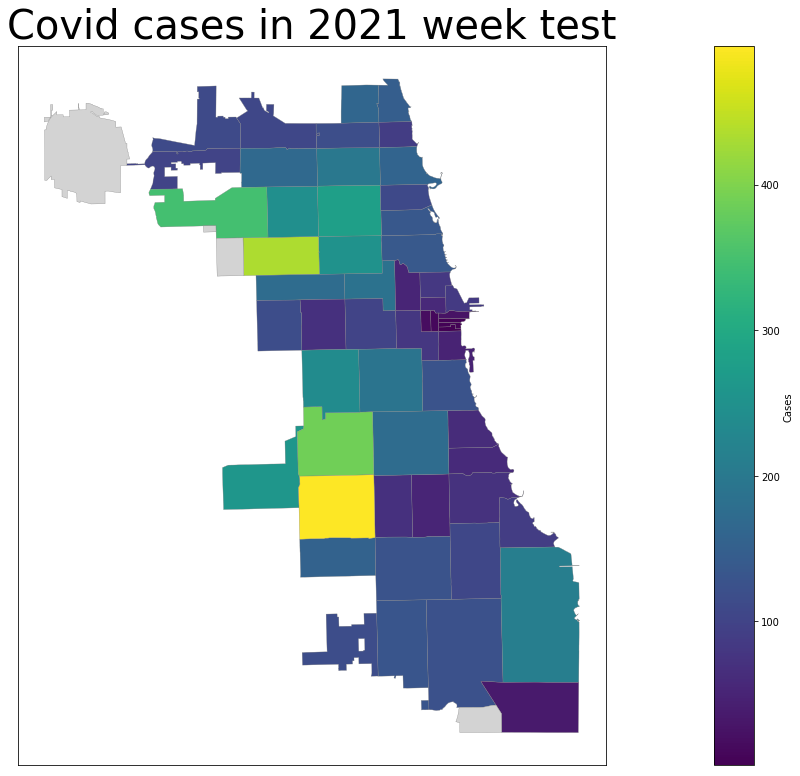

In [93]:
fig, ax = pyplot.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged.plot(ax=ax, column='Cases - Weekly', missing_kwds={'color':'lightgrey'},
                 edgecolor='grey', linewidth=.3, legend=True, cax=cax,
                legend_kwds={'label':'Cases', 'orientation':'vertical'})
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Covid cases in 2021 week ', fontsize=40)
plt.savefig('2021_week_test')

In [85]:
# generate all images 
df = df_2021
df = df.dropna()
for i in range (1,15):
 
    df1 = df.loc[df['Week Number'] == i]
    merged = chicago.merge(df1, left_on='zip', right_on='ZIP Code', how='left') #merge into gdf (with all states)
    merged["center"] = merged["geometry"].centroid
    merged_points1 = merged.copy()
    merged_points1.set_geometry("center", inplace = True)
    fig, ax = pyplot.subplots(1,1, figsize=(15,15))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    merged.plot(ax=ax, column='Cases - Weekly', missing_kwds={'color':'lightgrey'},
                     edgecolor='grey', linewidth=.3, legend=True, cax=cax,
                    legend_kwds={'label':'Cases', 'orientation':'vertical'})
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Covid cases in 2021 week '+str(i), fontsize=40)
    plt.savefig('2021_week_test_'+ str(i))
    plt.close()
    

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a